**Project:** Data Mining I (2025/26)

**Group:** 15

**Members:**
- Beatriz Boura
- Dinis Gaspar
- Leonor Cardoso
- Margarida Cruz

**Table of contents**<a id='toc0_'></a>    
1. [Imports](#toc1_)    
2. [Duplicate Evaluation](#toc2_)    
3. [Exploratory Data Analysis](#toc3_)    
4. [Feature Transformations](#toc4_)    
5. [Outliers](#toc5_)    
6. [Missing Values](#toc6_)    
7. [Correlations](#toc7_)    
8. [Final Transformations and Dataset Export](#toc8_)    
8.1. [Data For Modeling](#toc8_1_)    
8.2. [Data for Analysis](#toc8_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
import sompy
from sompy.sompy import SOMFactory

NumExpr defaulting to 12 threads.
CACHEDIR=C:\Users\dinis\.matplotlib
Using fontManager instance from C:\Users\dinis\.matplotlib\fontlist-v390.json


# 1. <a id='toc1_'></a>[Imports](#toc0_)


This section contains the imports of the packages that will be used and the dataset.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from feature_engine.creation import CyclicalFeatures

from utils_preprocessing import (distribution_plot_grid, cor_heatmap, outlier_filter_IQR, outlier_count_IQR)

pd.options.display.float_format = '{:.2f}'.format
sns.set_palette('tab10')
pd.set_option("display.max_columns", None)

In [3]:
%cd ..
%cd Datasets
# Importing the data with the Date of Birth already in date format
data = pd.read_csv('absenteeism_data.csv', parse_dates=['Date of Birth'], sep=';')
# Creating a copy of the raw data, in case it's needed
data_raw = data.copy()
data.head()

c:\Users\dinis\OneDrive\Ambiente de Trabalho\Faculdade - MGI-BI\1º ano\1º Semestre\Data Mining I\Project\DM_Project
c:\Users\dinis\OneDrive\Ambiente de Trabalho\Faculdade - MGI-BI\1º ano\1º Semestre\Data Mining I\Project\DM_Project\Datasets


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Days since previous absence,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,Years until retirement,Date of Birth,Disciplinary failure,Education,Number of children,Social drinker,Social smoker,Number of pets,Weight,Height,Body mass index,Absenteeism time in hours
0,11,Unjustified absence,July,Tuesday,Summer,0.00,289,36,69,13,32,1992-08-15,No,1,2,Y,No,1,90,172,30,4
1,36,Unspecified,July,Tuesday,NaN,0.00,118,13,26,18,15,1975-09-02,Yes,1,1,Y,No,0,98,178,31,0
2,3,Medical consultation,July,Wednesday,Summer,0.00,179,51,108,18,27,1987-04-08,No,1,0,Yes,No,0,89,170,31,2
3,7,Diseases of the eye and adnexa,July,Thursday,NaN,0.00,279,5,5,14,26,1986-07-25,No,1,2,Yes,Yes,0,68,168,24,4
4,11,Medical consultation,July,Thursday,Summer,0.00,289,36,69,13,32,1992-08-15,No,1,2,Yes,No,1,90,172,30,2


# 2. <a id='toc2_'></a>[Duplicate Evaluation](#toc0_)

Before we begin exploring the data we have, we will remove any instances of full duplicates, as these contain completely redundant information and may bias models and analysis.

In [4]:
duplicates = data[data.duplicated(keep=False)]
duplicates

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Days since previous absence,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,Years until retirement,Date of Birth,Disciplinary failure,Education,Number of children,Social drinker,Social smoker,Number of pets,Weight,Height,Body mass index,Absenteeism time in hours
11,20,NaN,NaN,NaN,NaN,0.00,260,50,94,11,29,1989-02-20,No,1,4,Yes,No,0,65,168,23,8
13,20,NaN,NaN,NaN,NaN,0.00,260,50,94,11,29,1989-02-20,No,1,4,Yes,No,0,65,168,23,8
68,3,NaN,NaN,NaN,NaN,0.00,179,51,108,18,27,1987-04-08,No,1,0,Y,No,0,89,170,31,3
69,34,Medical consultation,October,Tuesday,Spring,0.00,118,10,22,10,28,1988-05-10,No,1,0,No,No,0,83,172,28,3
74,34,Medical consultation,October,Tuesday,Spring,0.00,118,10,22,10,28,1988-05-10,No,1,0,No,No,0,83,172,28,3
113,10,Patient follow-up,December,Wednesday,NaN,0.00,361,52,114,3,37,1997-07-08,No,1,1,Yes,No,4,80,172,27,8
116,28,Medical consultation,December,Tuesday,Spring,0.00,225,26,50,9,37,1997-08-03,No,1,1,No,No,2,69,169,24,2
117,10,Patient follow-up,December,Wednesday,NaN,0.00,361,52,114,3,37,1997-07-08,No,1,1,Yes,No,4,80,172,27,8
130,28,NaN,NaN,NaN,NaN,0.00,225,26,50,9,37,1997-08-03,No,1,1,No,No,2,69,169,24,1
131,34,Physiotherapy,January,Monday,Autumn,0.00,118,10,22,10,28,1988-05-10,No,1,0,No,No,0,83,172,28,2


In [5]:
data.drop_duplicates(keep='first', inplace=True)

In [6]:
len(data_raw) - len(data)

26

We have dropped 26 rows which were full duplicates of other rows.

# 3. <a id='toc3_'></a>[Exploratory Data Analysis](#toc0_)


In [7]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774 entries, 0 to 799
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               774 non-null    int64         
 1   reason_for_absence               722 non-null    object        
 2   month_of_absence                 719 non-null    object        
 3   day_of_the_week                  722 non-null    object        
 4   seasons                          557 non-null    object        
 5   days_since_previous_absence      755 non-null    float64       
 6   transportation_expense           774 non-null    int64         
 7   distance_from_residence_to_work  774 non-null    int64         
 8   estimated_commute_time           774 non-null    int64         
 9   service_time                     774 non-null    object        
 10  years_until_retirement           774 non-null    int64         
 11

The variables "Service time" and "Weight" are numerical variables, but have been assigned object datatype, this means they have some values which aren't numerical. All other variable datatypes match our expectations. To check what the cause of this is, we will get all the unique values of our categorical variables, we will take this chance to look for other inconsistencies.

In [9]:
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    print(f'{col}: {list(data[col].unique())}')

reason_for_absence: ['Unjustified absence', 'Unspecified', 'Medical consultation', 'Diseases of the eye and adnexa', 'Patient follow-up', 'Injury, poisoning and other consequences of external causes', 'Certain infectious and parasitic diseases', nan, 'Diseases of the digestive system', 'Diseases of the genitourinary system', 'Factors influencing health status and contact with health services', 'Diseases of the respiratory system', 'Diseases of the musculoskeletal system and connective tissue', 'Dental consultation', 'Symptoms, signs and abnormal clinical and laboratory findings', 'Laboratory examination', 'Blood donation', 'Diseases of the nervous system', 'Physiotherapy', 'Congenital malformations, deformations and chromosomal abnormalities', 'Diseases of the ear and mastoid process', 'Diseases of the skin and subcutaneous tissue', 'Mental and behavioural disorders', 'Diseases of the circulatory system', 'Pregnancy, childbirth and the puerperium', 'Endocrine, nutritional and metabolic

In [10]:
data.replace('-', np.nan, inplace=True)
data = data.astype({'weight' : 'Int64', 'service_time' : 'Int64'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774 entries, 0 to 799
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               774 non-null    int64         
 1   reason_for_absence               722 non-null    object        
 2   month_of_absence                 719 non-null    object        
 3   day_of_the_week                  722 non-null    object        
 4   seasons                          557 non-null    object        
 5   days_since_previous_absence      755 non-null    float64       
 6   transportation_expense           774 non-null    int64         
 7   distance_from_residence_to_work  774 non-null    int64         
 8   estimated_commute_time           774 non-null    int64         
 9   service_time                     746 non-null    Int64         
 10  years_until_retirement           774 non-null    int64         
 11

In [11]:
data.replace('Y', 'Yes', inplace=True)
print(f'{'social_smoker'}: {list(data['social_smoker'].unique())}')
print(f'{'social_drinker'}: {list(data['social_drinker'].unique())}')

social_smoker: ['No', 'Yes']
social_drinker: ['Yes', 'No']


In [12]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
id,774.00,17.98,1.00,10.00,18.00,28.00,36.00,10.94
days_since_previous_absence,755.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
transportation_expense,774.00,222.35,118.00,179.00,225.00,260.00,388.00,66.87
distance_from_residence_to_work,774.00,29.67,5.00,16.00,26.00,50.00,52.00,14.87
estimated_commute_time,774.00,59.03,5.00,29.00,52.00,94.00,114.00,31.25
service_time,746.00,12.51,1.00,9.00,13.00,16.00,29.00,4.41
years_until_retirement,774.00,26.65,-1.00,25.00,28.00,33.00,38.00,9.36
date_of_birth,774,1989-01-09 08:13:01.395348864,1967-11-02 00:00:00,1985-06-16 00:00:00,1988-06-01 00:00:00,1994-06-26 00:00:00,1998-12-19 00:00:00,NaN
education,774.00,1.28,1.00,1.00,1.00,1.00,4.00,0.66
number_of_children,774.00,1.06,0.00,0.00,1.00,2.00,4.00,1.12


In [13]:
data['days_since_previous_absence'].value_counts()

days_since_previous_absence
0.00    755
Name: count, dtype: int64

In [14]:
data.drop(['days_since_previous_absence'], axis=1, inplace=True)

In [15]:
data.describe(include='object').T

,count,unique,top,freq
reason_for_absence,722,28,Medical consultation,146
month_of_absence,719,12,March,85
day_of_the_week,722,6,Monday,157
seasons,557,4,Spring,152
disciplinary_failure,774,2,No,730
social_drinker,774,2,Yes,445
social_smoker,774,2,No,719


In [16]:
data.replace('Yes', 1, inplace=True)
data.replace('No', 0, inplace=True)

C:\Users\dinis\AppData\Local\Temp\ipykernel_25792\882932390.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('No', 0, inplace=True)


In [17]:
data['education'].value_counts(normalize=True)

education
1   0.83
3   0.10
2   0.06
4   0.01
Name: proportion, dtype: float64

In [18]:
data.loc[data['absenteeism_time_in_hours'] == 0, 'disciplinary_failure'].value_counts()

disciplinary_failure
1    44
0     4
Name: count, dtype: int64

In [19]:
data.loc[data['disciplinary_failure'] == 1, 'absenteeism_time_in_hours'].value_counts()

absenteeism_time_in_hours
0    44
Name: count, dtype: int64

<Axes: xlabel='disciplinary_failure', ylabel='absenteeism_time_in_hours'>

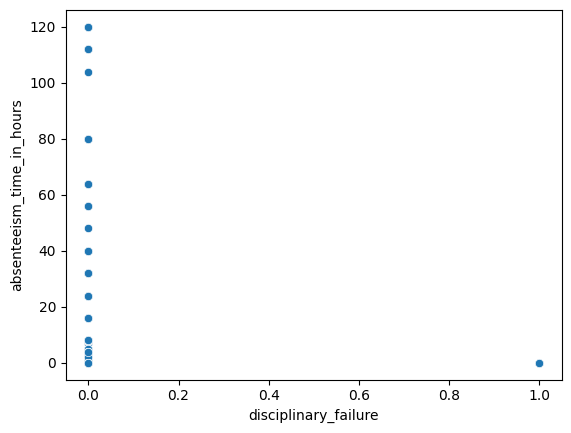

In [20]:
sns.scatterplot(data=data, x='disciplinary_failure', y='absenteeism_time_in_hours')

We're going to drop the 'id' variable, since it doesn't contain any relevant information going forward, and specially since it's not relevant for clustering. We'll also drop the "height" and "weight" variables, since we already have the "body_mass_index" variable that contains some of their information and gives an idea of a person's general health, despite it's caveats of lean mass composition. Furthermore, weight and height by themselves, specially with the presence of BMI, shouldn't provide much value into absenteeism trends.

In [21]:
data.drop(['id', 'height', 'weight'], axis=1, inplace=True)

# 4. <a id='toc4_'></a>[Feature Transformations](#toc0_)

The first transformation we will perform is a grouping of the reason for absence column into more general categories.<p>
Grouping the various reasons for absence into broader categories can help simplify the complexity of the analysis and improve the model's ability to identify patterns in absenteeism.
By categorizing reasons into groups such as 'Medical Care', 'Mental Disease', 'Chronic Disease', 'Maternity/Pregnancy-Related', 'Acute Disease', 'Unjustified absence', and 'Unspecified', 
the model can better capture the underlying causes of absenteeism without being overwhelmed by too many specific reasons.
<p> This categorization allows for a more focused analysis of how different types of absences impact overall absenteeism trends,
enabling the model to make more accurate predictions and provide valuable insights for managing employee attendance. Later on we will perform the encoding of this new variable. <p>
Below is a detailed list of each group and its correspoding justifications: <p>

---

**Unjustified absence**

* Unjustified absence

**Unspecified**

* Unspecified

**Medical Care**

* Medical consultation
* Dental consultation
* Physiotherapy
* Laboratory examination
* Patient follow-up
* Blood donation
* Factors influencing health status and contact with health services

**Mental Disease**

* Mental and behavioural disorders

**Chronic Disease**

* Diseases of the musculoskeletal system and connective tissue
* Diseases of the circulatory system
* Endocrine, nutritional and metabolic diseases
* Diseases of the nervous system
* Diseases of the blood and blood-forming organs and immune mechanism
* Neoplasms
* Congenital malformations, deformations and chromosomal abnormalities

**Maternity/Pregnancy-Related**

* Pregnancy, childbirth and the puerperium
* Certain conditions originating in the perinatal period

**Acute Disease**

* Injury, poisoning and other consequences of external causes
* Certain infectious and parasitic diseases
* Diseases of the digestive system
* Diseases of the genitourinary system
* Diseases of the respiratory system
* Diseases of the eye and adnexa
* Diseases of the skin and subcutaneous tissue
* Diseases of the ear and mastoid process
* Symptoms, signs and abnormal clinical and laboratory findings

In [22]:
justification_map = {
    # Direct mappings
    "Unjustified absence": "Unjustified absence",
    "Unspecified": "Unspecified",

    # Medical Care
    "Medical consultation": "Medical Care",
    "Dental consultation": "Medical Care",
    "Physiotherapy": "Medical Care",
    "Laboratory examination": "Medical Care",
    "Patient follow-up": "Medical Care",
    "Blood donation": "Medical Care",
    "Factors influencing health status and contact with health services": "Medical Care",

    # Mental Disease
    "Mental and behavioural disorders": "Mental Disease",

    # Chronic Disease
    "Diseases of the musculoskeletal system and connective tissue": "Chronic Disease",
    "Diseases of the circulatory system": "Chronic Disease",
    "Endocrine, nutritional and metabolic diseases": "Chronic Disease",
    "Diseases of the nervous system": "Chronic Disease",
    "Diseases of the blood and blood-forming organs and immune mechanism": "Chronic Disease",
    "Neoplasms": "Chronic Disease",
    "Congenital malformations, deformations and chromosomal abnormalities": "Chronic Disease",

    # Maternity / Pregnancy Related
    "Pregnancy, childbirth and the puerperium": "Maternity/Pregnancy-Related",
    "Certain conditions originating in the perinatal period": "Maternity/Pregnancy-Related",

    # Acute Disease
    "Injury, poisoning and other consequences of external causes": "Acute Disease",
    "Certain infectious and parasitic diseases": "Acute Disease",
    "Diseases of the digestive system": "Acute Disease",
    "Diseases of the genitourinary system": "Acute Disease",
    "Diseases of the respiratory system": "Acute Disease",
    "Diseases of the eye and adnexa": "Acute Disease",
    "Diseases of the skin and subcutaneous tissue": "Acute Disease",
    "Diseases of the ear and mastoid process": "Acute Disease",
    "Symptoms, signs and abnormal clinical and laboratory findings": "Acute Disease",
}


In [23]:
data['reason_for_absence'] = data['reason_for_absence'].map(justification_map)
data.head()

,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,estimated_commute_time,service_time,years_until_retirement,date_of_birth,disciplinary_failure,education,number_of_children,social_drinker,social_smoker,number_of_pets,body_mass_index,absenteeism_time_in_hours
0,Unjustified absence,July,Tuesday,Summer,289,36,69,13,32,1992-08-15,0,1,2,1,0,1,30,4
1,Unspecified,July,Tuesday,NaN,118,13,26,18,15,1975-09-02,1,1,1,1,0,0,31,0
2,Medical Care,July,Wednesday,Summer,179,51,108,18,27,1987-04-08,0,1,0,1,0,0,31,2
3,Acute Disease,July,Thursday,NaN,279,5,5,14,26,1986-07-25,0,1,2,1,1,0,24,4
4,Medical Care,July,Thursday,Summer,289,36,69,13,32,1992-08-15,0,1,2,1,0,1,30,2


The next transformation we will perform in this section is obtaining the age from the date of birth. <p>Age can be a significant factor in absenteeism, as it may correlate with health issues, family responsibilities, and work-life balance. 
Older employees might have different absenteeism patterns compared to younger ones due to various life stages and health conditions. Age diversity in the workplace can impact team dynamics and productivity.
Having age as a feature allows the model to capture these potential correlations and improve its predictive accuracy.
Besides that, only having date of birth is not very useful for the model.

In [24]:
# We subtract the date of birth from the current date and then divide, with a floor division, 
# the total number of days by 365.25 to obtain the age.
data['age'] = data['date_of_birth'].apply(lambda x: (dt.today() - x).days // 365.25) 
data.drop(['date_of_birth'], axis=1, inplace=True)

As we saw above, the original Education variable contains a very uneven distribution, with a very large majority correspoding to high school education. Additionally, due to how relatively uncommon the Graduate, Postgraduate/Master and Doctor values are, combining them into a single level results in a more balanced feature overall. It's also worth considering that this transformation relies on the belief/assumption that the difference in behavior between levels of higher education is much smaller when compared to the difference between higher education and high school. <p>
By recoding the education levels into two categories: 'High School' (previously level 1, now level 0) and 'Graduate/Postgraduate/Master and Doctor' (previously levels 2, 3, and 4, now level 1), 
we simplify the feature and potentially enhance its predictive power. This binary categorization allows the model to focus on the broader distinction 
between basic and advanced education levels, which may be more relevant for understanding absenteeism patterns.

In [25]:
data['higher_education'] = data['education'].apply(lambda x: 0 if x == 1 else 1)
data['higher_education'].value_counts()

higher_education
0    641
1    133
Name: count, dtype: int64

In [26]:
data.drop('education', axis=1, inplace=True)

The next feature we will create is a ratio between the transportation cost and the distance of an employee's residence to the work site. <p>
The cost of commuting can significantly impact an employee's decision to take absences. A higher commute cost per kilometer may lead to increased stress and fatigue, 
which can contribute to absenteeism. Additionally, employees with longer or more expensive commutes might be more likely to take absences to avoid the financial burden associated with commuting.
By including commute cost per kilometer as a feature, the model can better understand the relationship between commuting expenses and absenteeism patterns.

In [27]:
data['commute_cost_per_km'] = data['transportation_expense'] / data['distance_from_residence_to_work']
#data.drop(columns=['transportation_expense', 'distance_from_residence_to_work'], inplace=True)

The final transformation we will perform in this section is essentially a merge between the social drinker and social smoker variables. <p> Social smoking and drinking habits can be indicative of an individual's overall health and lifestyle choices, which may influence absenteeism. 
Employees who engage in social smoking or drinking may be more prone to health issues, stress, or other factors that could lead to increased absenteeism.
By combining these two behaviors into a single 'risk_behavior' feature, the model can capture the potential impact of these habits on absenteeism patterns, 
allowing for a more comprehensive understanding of the factors contributing to employee absences, while removing some complexity. Additionally, the social smoker variable is a very unbalanced variable, combining it with the social drinker variable allows us to retain this information. We will then drop the original variables.


In [28]:
data['risk_behavior'] = ((data['social_smoker'] == 1) | (data['social_drinker'] == 1))
data.drop(['social_smoker', 'social_drinker'], axis=1, inplace=True)

# 5. <a id='toc5_'></a>[Outliers](#toc0_)

Now we will analyze the existence of outliers in our data and perform transformation if needed. Here we are checking for outliers in numerical variables, value consistency checking was peformed during the [Exploratory Data Analysis](#toc3_) stage. <p>
**Note:** Our distinction between normal (default) or extreme outliers falls in line the commonly used definition:
+ Normal: 1.5 IQR beyond the quartiles
+ Extreme: 3 IQR beyond the quartiles

In [29]:
# Getting the list of numerical columns 
# Excluding the binary variables as they
# can mess a little with some of the functions
# and these aren't really numerical features
num_cols = data.select_dtypes(include=np.number).drop(['disciplinary_failure', 'higher_education'], axis=1).columns

In [30]:
outlier_count_IQR(data, num_cols)

,N Outliers
Variable,
transportation_expense,3
distance_from_residence_to_work,0
estimated_commute_time,0
service_time,5
years_until_retirement,55
number_of_children,0
number_of_pets,48
body_mass_index,0
absenteeism_time_in_hours,50


In [31]:
outlier_filter_IQR(data, num_cols)

Excluding all normal outliers, we are left with 72.22% of our dataset


In [32]:
outlier_count_IQR(data, num_cols, outlier_type='extreme')

,N Outliers
Variable,
transportation_expense,0
distance_from_residence_to_work,0
estimated_commute_time,0
service_time,0
years_until_retirement,45
number_of_children,0
number_of_pets,48
body_mass_index,0
absenteeism_time_in_hours,32


In [33]:
outlier_filter_IQR(data, num_cols, outlier_type='extreme')

Excluding all extreme outliers, we are left with 84.63% of our dataset


From the cells above, we can undoubtedly conclude that simply dropping rows with outliers is not feasible as it would result in removing far too much of our data. We'll now have a look at the distribution of our variables.

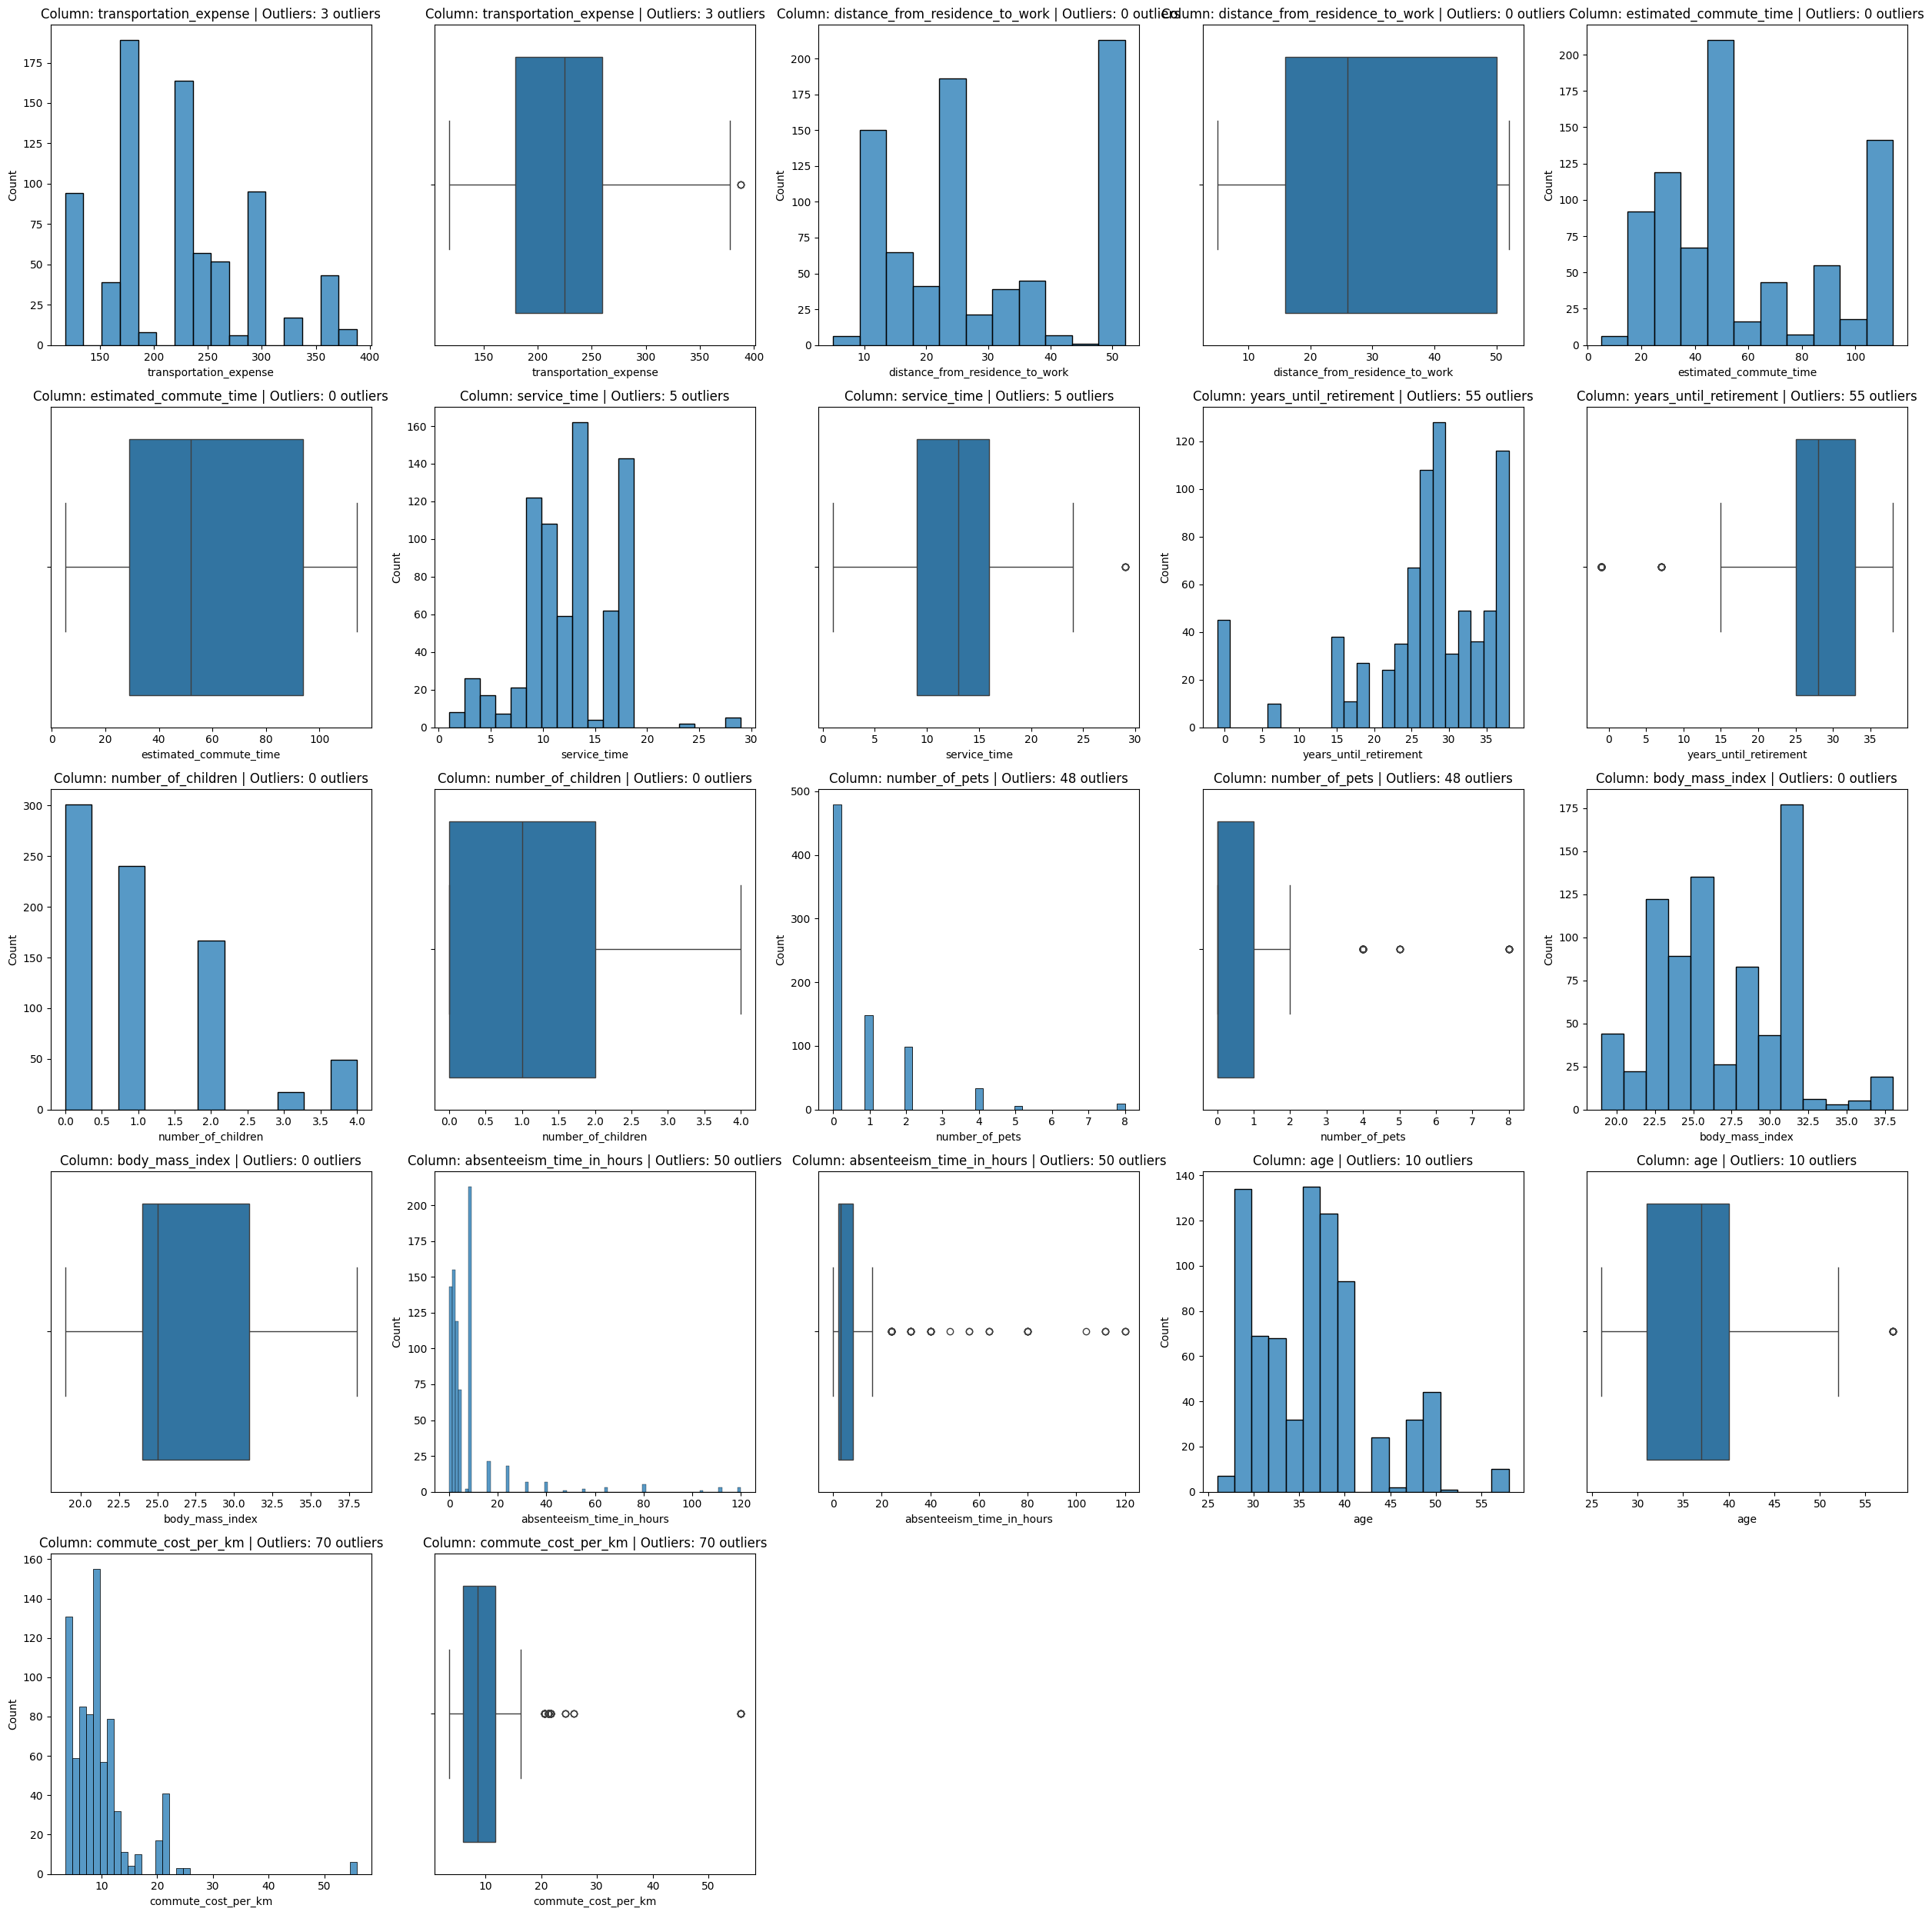

In [34]:
distribution_plot_grid(data, num_cols)

Variables "distance_from_residence_to_work", "estimated_commute_time", "number_of_children", "body_mass_index" have no outliers at all. <p>
For variables like "transportation_expense", "service_time" and "age" where there are very few outliers, which fall very close to threshold for normal outliers, it's clear that no action is needed and these values are perfectly fine. <p>
For the remaining variables, due to the extremity of some of their outliers, we will set thresholds where any value outside these thresholds will be replaced by the threshold. To try and retain the most information possible, these thresholds will still fall outside the normal outlier limits, for that reason we will use the RobustScaler when scaling our data later on. These thresholds are arbitrary and come from visual inspection of the histograms and boxplots.<p>
In the case of the years_until_retirement variable, we will set a lower threshold of 5.

In [35]:
data.loc[data['years_until_retirement'] < 5, 'years_until_retirement'] = 5

We will apply an upper threshold of 4 to the number_of_pets variable.

In [36]:
data.loc[data['number_of_pets'] > 4, 'number_of_pets'] = 4

Variable absenteeism_time_in_hours will be limited to a maximum value of 30.

In [37]:
data.loc[data['absenteeism_time_in_hours'] > 30, 'absenteeism_time_in_hours'] = 30

Finally, in the variable commute_cost_per_km we will use an upper threshold of 30 as well.

In [38]:
data.loc[data['commute_cost_per_km'] > 30, 'commute_cost_per_km'] = 30

We will now have another look at the distributions of our variables after these transformations.

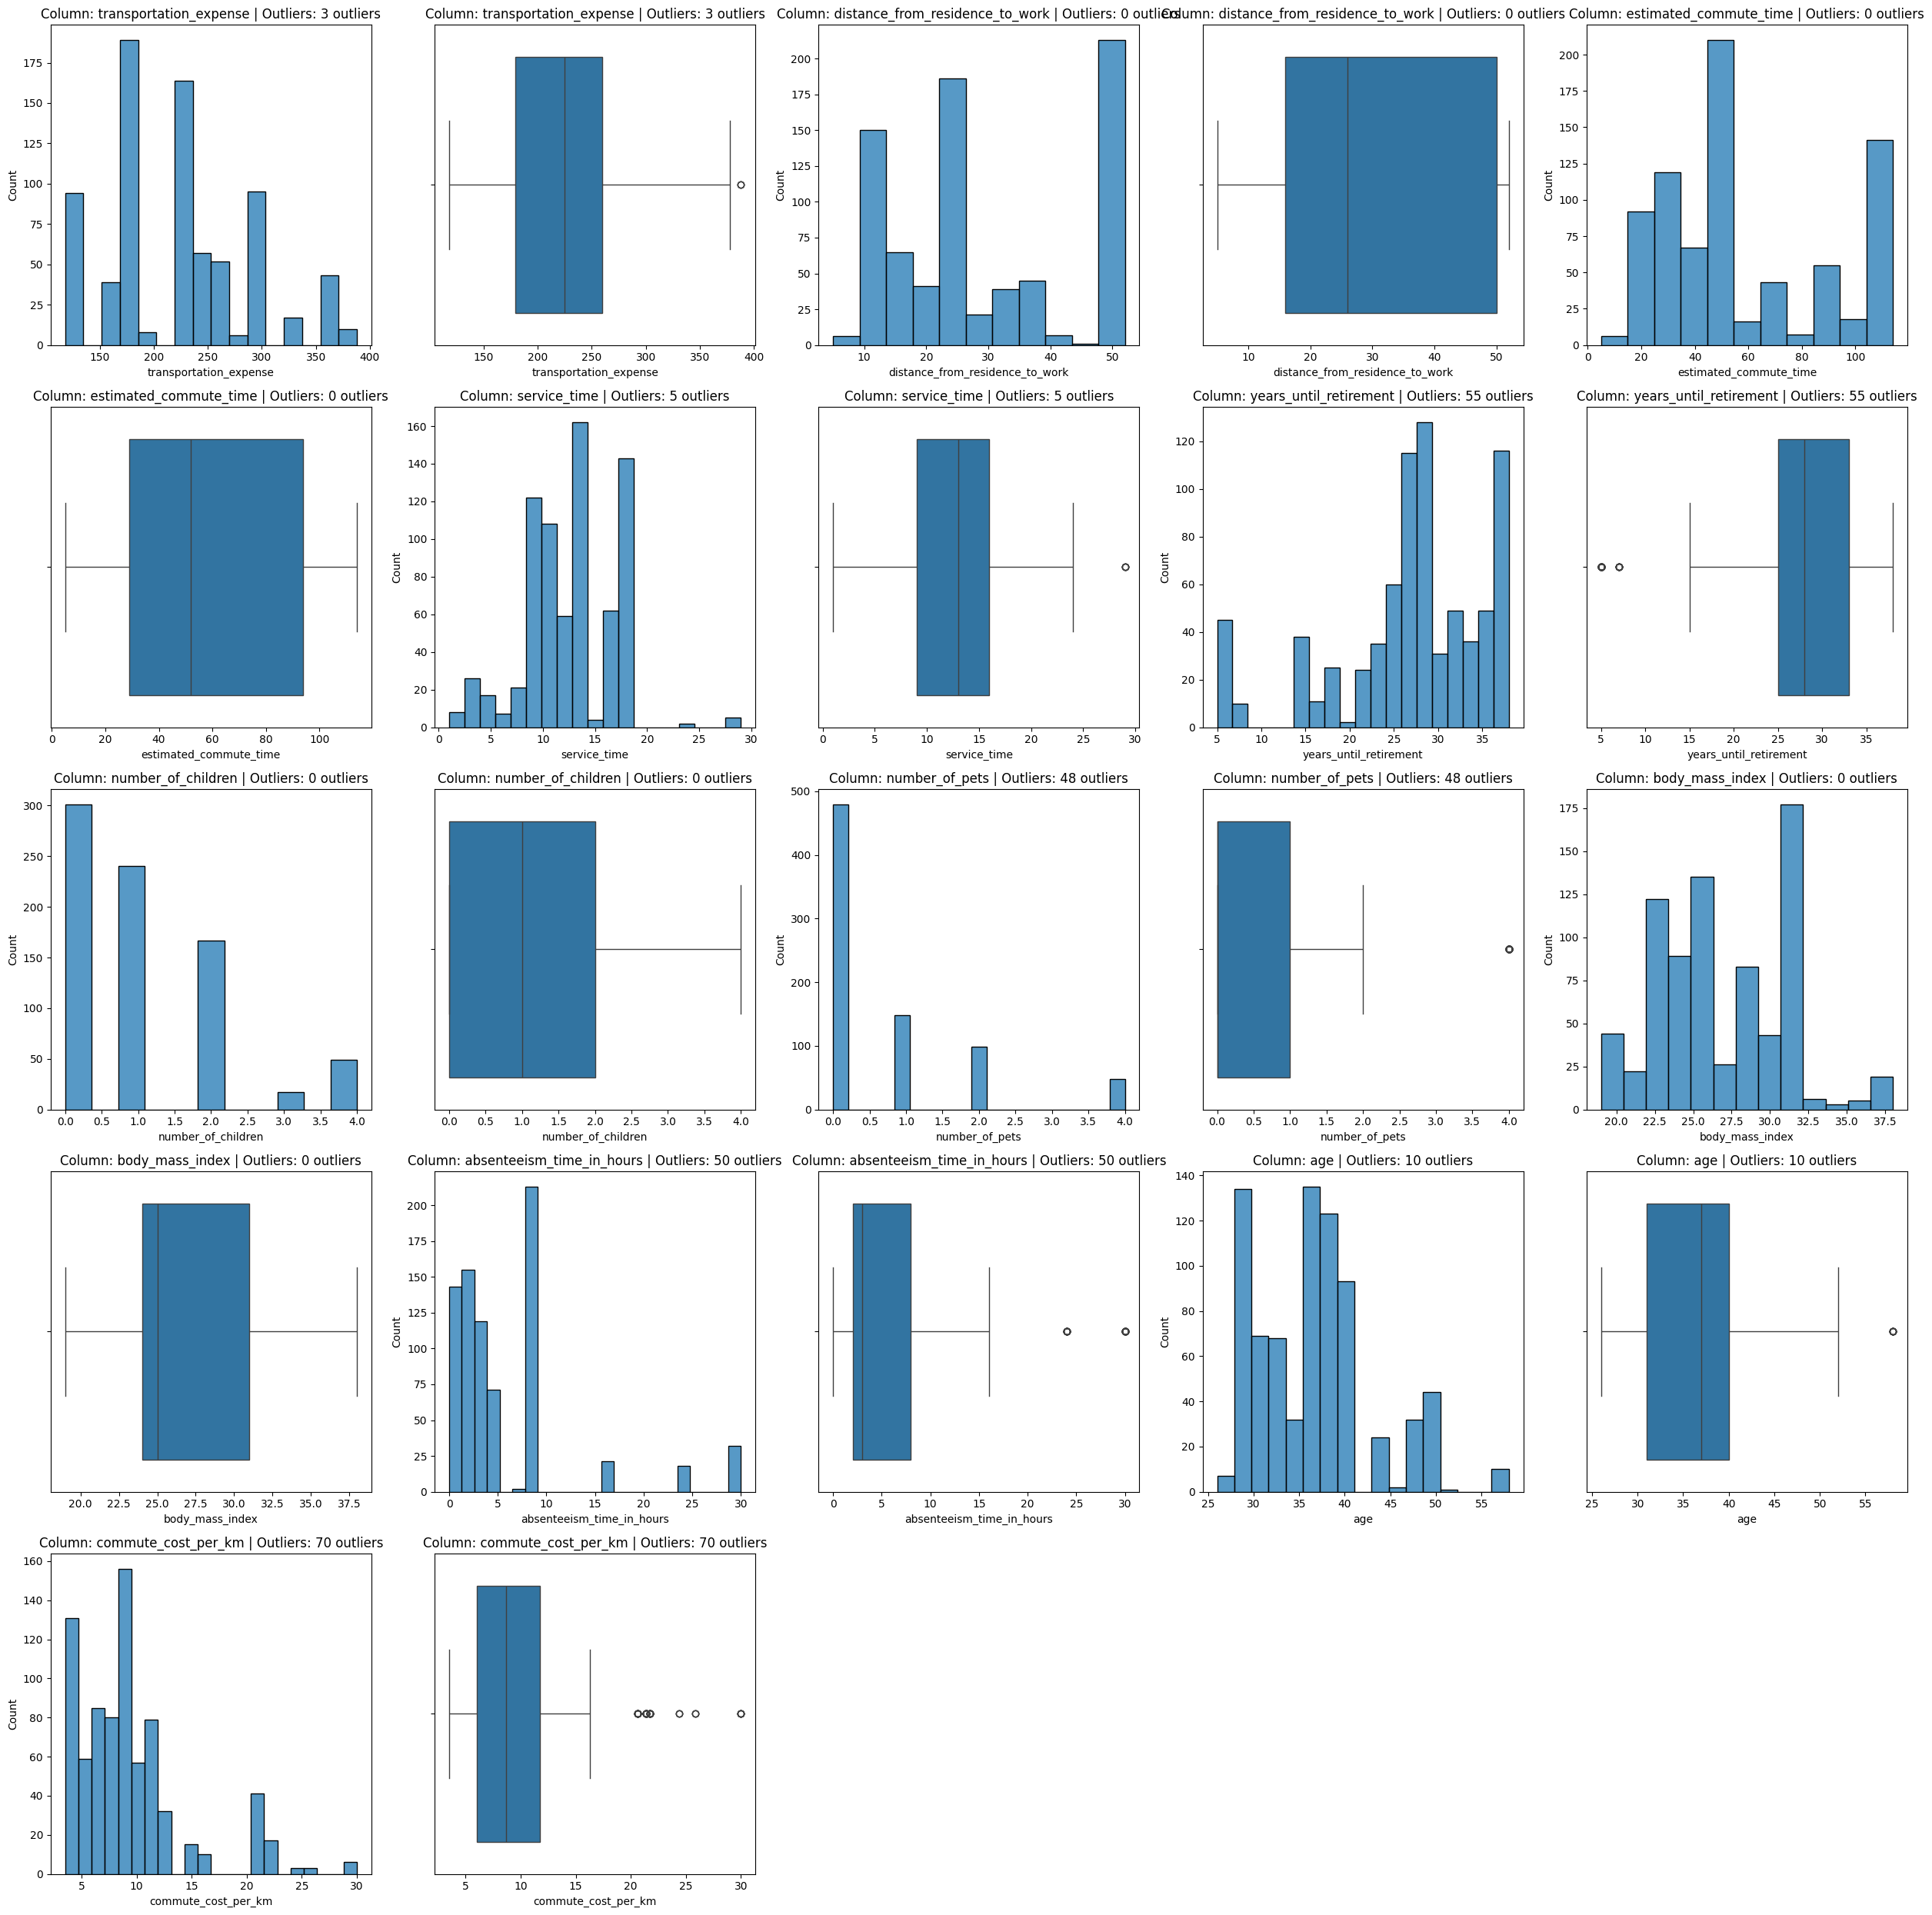

In [39]:
distribution_plot_grid(data, num_cols)

As expected, the values now look much more balanced.

# 6. <a id='toc6_'></a>[Missing Values](#toc0_)

We'll start by checking the number of missing values per variable.

In [40]:
data.isna().sum()

reason_for_absence                  52
month_of_absence                    55
day_of_the_week                     52
seasons                            217
transportation_expense               0
distance_from_residence_to_work      0
estimated_commute_time               0
service_time                        28
years_until_retirement               0
disciplinary_failure                 0
number_of_children                   0
number_of_pets                       0
body_mass_index                      0
absenteeism_time_in_hours            0
age                                  0
higher_education                     0
commute_cost_per_km                  0
risk_behavior                        0
dtype: int64

In [41]:
data.isna().sum() / len(data) * 100

reason_for_absence                 6.72
month_of_absence                   7.11
day_of_the_week                    6.72
seasons                           28.04
transportation_expense             0.00
distance_from_residence_to_work    0.00
estimated_commute_time             0.00
service_time                       3.62
years_until_retirement             0.00
disciplinary_failure               0.00
number_of_children                 0.00
number_of_pets                     0.00
body_mass_index                    0.00
absenteeism_time_in_hours          0.00
age                                0.00
higher_education                   0.00
commute_cost_per_km                0.00
risk_behavior                      0.00
dtype: float64

As we can see from the two outputs above, there are multiple variables with missing values in our data. In particular, four categorical variables (Reason for absence, Month of Absence, Day of the Week and Seasons) and two numerical features (Service Time and Height). The number of corresponding missing values can be found above.  

For the 'Reason for absence' we will consider all missing values to be 'Unspecified', this is because there is already an 'Unjustified absence' category, which leads us to assume that missing values in this variable are simply absences where a reason was not given, but weren't classified as unjustified, thus making the 'Reason for absence' 'Unspecified'.

In [42]:
data.fillna({'reason_for_absence':'Unspecified'},  inplace=True)

We will drop the 'Seasons' variable, because we will use the 'Month of absence' variable which allows us to analyze based on seasons anyway, thus removing somewhat redundant information. We could have used the month column to handle a decent amount of the missing season values, but since this information is, in our opinion, not very useful, we won't have to worry about these missing values.

In [43]:
data.drop('seasons', axis=1, inplace=True)

For the remaining features, we will use KNNImputer, with 5 neighbors. For the purposes of imputation, we will encode the month and weekday columns as ordinal (1-12 and 1-6, respectively), later on these will be encoded with a cyclical methodology, using sine and cosine, to adress the cyclical nature of months and weeks, i.e. January is closer to December than is it to March for example. Unfortunately due to the limitations of the package we will use for that, for imputation using this method could result in imputed values that are difficult to trace back to a an original weekday or month value. <p> **Note:** For this stage of imputation we won't use the reason for absence variable, this will be added back when performing the final transformations and exporting the datasets to be used for clustering.

In [44]:
# Creating a copy of the data to perform imputation and the 
# needed transformations associated with it. As mentioned above
# for imputation, we drop the reason_for_absence variable.
data_for_imp = data.drop('reason_for_absence', axis=1)

In [45]:
# Creating the dictionaries used to perform the enconding of 
# the months and the days of the week with ordinal values.

month_map = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6,
            "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}
weekday_map = {"Monday":1, "Tuesday":2, "Wednesday":3,
            "Thursday":4, "Friday":5, "Saturday":6}

# Creating the reverse dictionaries used to perform the enconding of 
# the months and the days of the week with ordinal values. These 
# will be used to obtain the original month and weekday values,
# essentially to perfrorm the inverse of the initial transformation.

reverse_weekday_map = {v:k for k, v in weekday_map.items()}
reverse_month_map = {v:k for k, v in month_map.items()}

# Applying the maps for enconding

data_for_imp['month_of_absence'] = data_for_imp['month_of_absence'].map(month_map)
data_for_imp['day_of_the_week'] = data_for_imp['day_of_the_week'].map(weekday_map)

data_for_imp.head()

,month_of_absence,day_of_the_week,transportation_expense,distance_from_residence_to_work,estimated_commute_time,service_time,years_until_retirement,disciplinary_failure,number_of_children,number_of_pets,body_mass_index,absenteeism_time_in_hours,age,higher_education,commute_cost_per_km,risk_behavior
0,7.00,2.00,289,36,69,13,32,0,2,1,30,4,33.00,0,8.03,True
1,7.00,2.00,118,13,26,18,15,1,1,0,31,0,50.00,0,9.08,True
2,7.00,3.00,179,51,108,18,27,0,0,0,31,2,38.00,0,3.51,True
3,7.00,4.00,279,5,5,14,26,0,2,0,24,4,39.00,0,30.00,True
4,7.00,4.00,289,36,69,13,32,0,2,1,30,2,33.00,0,8.03,True


Since we are using a distance-based method (KNNImputer) for imputation, we must first scale our data to ensure the scales of variables don't affect the results. Since our data contains some conciously unaddressed outliers, we will use RobustScaler for data scaling, this method is similar to MinMaxScaler except instead of minimum and maximum values, it uses the values of the 1st and 3rd quartiles, making it more robust to the existence of outliers. <p>
**Note:** We are going to include some categorical variables within our data used for this method, such as disciplinary_failure, higher_education, risk_behavior, encoded as binary variables (dummy variable enconding for variables with only 2 values). Traditionally, this can be complicated as defining how to measure categorical differences within a distance formula like the euclidean distance can be difficult. In our case, within the euclidean distance formula, these categorical differences will have the same impact as the difference between observations with Q1 and Q3 values for a numerical variable. In our opinion, this is a fair compromise and allows us to include information that we believe is relevant in our models, without generating inherent bias. This explanation will be repeated later on, when finalizing the data to be used for modelling clusters.

In [46]:
# Instantiating the scaler
scaler = RobustScaler()
# Creating a DataFrame with the scaled data for imputation, by applying
# the scaler, ensuring the index and column names are unchanged
data_for_imp_scl = pd.DataFrame(scaler.fit_transform(data_for_imp), columns=data_for_imp.columns, index=data_for_imp.index)
data_for_imp_scl.head()

,month_of_absence,day_of_the_week,transportation_expense,distance_from_residence_to_work,estimated_commute_time,service_time,years_until_retirement,disciplinary_failure,number_of_children,number_of_pets,body_mass_index,absenteeism_time_in_hours,age,higher_education,commute_cost_per_km,risk_behavior
0,0.17,-0.50,0.79,0.29,0.26,0.00,0.50,0.00,0.50,1.00,0.71,0.17,-0.44,0.00,-0.11,0.00
1,0.17,-0.50,-1.32,-0.38,-0.40,0.71,-1.62,1.00,0.00,0.00,0.86,-0.50,1.44,0.00,0.07,0.00
2,0.17,0.00,-0.57,0.74,0.86,0.71,-0.12,0.00,-0.50,0.00,0.86,-0.17,0.11,0.00,-0.90,0.00
3,0.17,0.50,0.67,-0.62,-0.72,0.14,-0.25,0.00,0.50,0.00,-0.14,0.17,0.22,0.00,3.73,0.00
4,0.17,0.50,0.79,0.29,0.26,0.00,0.50,0.00,0.50,1.00,0.71,-0.17,-0.44,0.00,-0.11,0.00


Now that our data is scaled, we can perform the imputation using an instance of KNNImputer. The resulting dataframe contains all of the imputation required still in its scaled format. This dataset will serve as the base, with some changes, for the data we will use for modelling.

In [47]:
# Instantiating the imputer
imputer = KNNImputer(n_neighbors=5)
# Creating a DataFrame with the imputed (still scaled) data by applying
# the imputer, ensuring the index and column names are unchanged
imputed_df_scaled = pd.DataFrame(imputer.fit_transform(data_for_imp_scl), columns=data_for_imp.columns, index=data_for_imp.index)
imputed_df_scaled.head()

,month_of_absence,day_of_the_week,transportation_expense,distance_from_residence_to_work,estimated_commute_time,service_time,years_until_retirement,disciplinary_failure,number_of_children,number_of_pets,body_mass_index,absenteeism_time_in_hours,age,higher_education,commute_cost_per_km,risk_behavior
0,0.17,-0.50,0.79,0.29,0.26,0.00,0.50,0.00,0.50,1.00,0.71,0.17,-0.44,0.00,-0.11,0.00
1,0.17,-0.50,-1.32,-0.38,-0.40,0.71,-1.62,1.00,0.00,0.00,0.86,-0.50,1.44,0.00,0.07,0.00
2,0.17,0.00,-0.57,0.74,0.86,0.71,-0.12,0.00,-0.50,0.00,0.86,-0.17,0.11,0.00,-0.90,0.00
3,0.17,0.50,0.67,-0.62,-0.72,0.14,-0.25,0.00,0.50,0.00,-0.14,0.17,0.22,0.00,3.73,0.00
4,0.17,0.50,0.79,0.29,0.26,0.00,0.50,0.00,0.50,1.00,0.71,-0.17,-0.44,0.00,-0.11,0.00


Scaled data is great for modelling as it removing the bias that can result from different feature scales, but for the purpose of analysis, it's much easier and more interpretable to have the data in its original scale, for that reason we will use the scaler to perform the inverse transformation, thus obtaining the values in their original scale. <p> Since we will need to also get the original month and weekday values later on, after performing this transformation we will round values in this variables, to ensure they can be mapped back to a month or weekday (for example, imputation may return a value for month of 7.8, when we apply the reverse month mapping this value won't have an associated month, if we round it to 8, it will be associated with August). Additionally we are saving the imputed and rounded (unscaled) values of these 2 columns in a special variable so that they can be used later for the cyclical enconding mentioned above. <p> We will therefore, drop them from the imputed and scaled dataframe, after we've used them to obtain the original unscaled and rounded ordinal encondings, as they won't be used there and will be replaced by this cyclical enconding.

In [48]:
# Creating a DataFrame with the imputed and original scale data by applying the
# inverse method of the scaler, ensuring the index and column names are unchanged
imputed_df = pd.DataFrame(scaler.inverse_transform(imputed_df_scaled), columns=data_for_imp.columns, index=data_for_imp.index)

# Rounding the month and weekday values to ensure a match with the mappings (all integer values)
imputed_df[['month_of_absence', 'day_of_the_week']] = imputed_df[['month_of_absence', 'day_of_the_week']].round()

# Saving the ordinal encondings to be used for the application of the cyclical method later on
imputed_month_weekday_ordinal = imputed_df[['month_of_absence', 'day_of_the_week']]

# Dropping the variables from the imputed and scaled dataframe as they are no longer needed there
imputed_df_scaled.drop(['month_of_absence', 'day_of_the_week'], axis=1, inplace=True)

# Applying the reverse maps of months and weekdays to get actual weekday or month values
imputed_df['month_of_absence'] = imputed_df['month_of_absence'].map(reverse_month_map)
imputed_df['day_of_the_week'] = imputed_df['day_of_the_week'].map(reverse_weekday_map)
imputed_df

,month_of_absence,day_of_the_week,transportation_expense,distance_from_residence_to_work,estimated_commute_time,service_time,years_until_retirement,disciplinary_failure,number_of_children,number_of_pets,body_mass_index,absenteeism_time_in_hours,age,higher_education,commute_cost_per_km,risk_behavior
0,July,Tuesday,289.00,36.00,69.00,13.00,32.00,0.00,2.00,1.00,30.00,4.00,33.00,0.00,8.03,1.00
1,July,Tuesday,118.00,13.00,26.00,18.00,15.00,1.00,1.00,0.00,31.00,0.00,50.00,0.00,9.08,1.00
2,July,Wednesday,179.00,51.00,108.00,18.00,27.00,0.00,0.00,0.00,31.00,2.00,38.00,0.00,3.51,1.00
3,July,Thursday,279.00,5.00,5.00,14.00,26.00,0.00,2.00,0.00,24.00,4.00,39.00,0.00,30.00,1.00
4,July,Thursday,289.00,36.00,69.00,13.00,32.00,0.00,2.00,1.00,30.00,2.00,33.00,0.00,8.03,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,July,Tuesday,289.00,36.00,69.00,13.00,32.00,0.00,2.00,1.00,30.00,8.00,33.00,0.00,8.03,1.00
796,July,Tuesday,235.00,11.00,20.00,14.00,28.00,0.00,1.00,1.00,29.00,4.00,37.00,1.00,21.36,0.00
797,July,Tuesday,118.00,14.00,34.00,13.00,25.00,0.00,1.00,4.00,34.00,0.00,40.00,0.00,8.43,1.00
798,July,Wednesday,231.00,35.00,63.00,14.00,26.00,0.00,2.00,2.00,35.00,0.00,39.00,0.00,6.60,1.00


The dataset we have created in the cell above will serve as the base for the dataset we'll use to analyze clusters and compare clustering solutions.

Finally, we will just double check that neither the scaled or unscaled imputed dataframes have no missing values.

In [49]:
imputed_df.isna().sum()

month_of_absence                   0
day_of_the_week                    0
transportation_expense             0
distance_from_residence_to_work    0
estimated_commute_time             0
service_time                       0
years_until_retirement             0
disciplinary_failure               0
number_of_children                 0
number_of_pets                     0
body_mass_index                    0
absenteeism_time_in_hours          0
age                                0
higher_education                   0
commute_cost_per_km                0
risk_behavior                      0
dtype: int64

In [50]:
imputed_df_scaled.isna().sum()

transportation_expense             0
distance_from_residence_to_work    0
estimated_commute_time             0
service_time                       0
years_until_retirement             0
disciplinary_failure               0
number_of_children                 0
number_of_pets                     0
body_mass_index                    0
absenteeism_time_in_hours          0
age                                0
higher_education                   0
commute_cost_per_km                0
risk_behavior                      0
dtype: int64

As expected, we no longer have any missing values in our data.

# 7. <a id='toc7_'></a>[Correlations](#toc0_)

We will now check whether there are highly correlated pairs of columns and handling them if needed.

In [51]:
num_cols = imputed_df.select_dtypes(np.number)
# We can use the unscaled or scaled DataFrame here, results don't change (as expected)

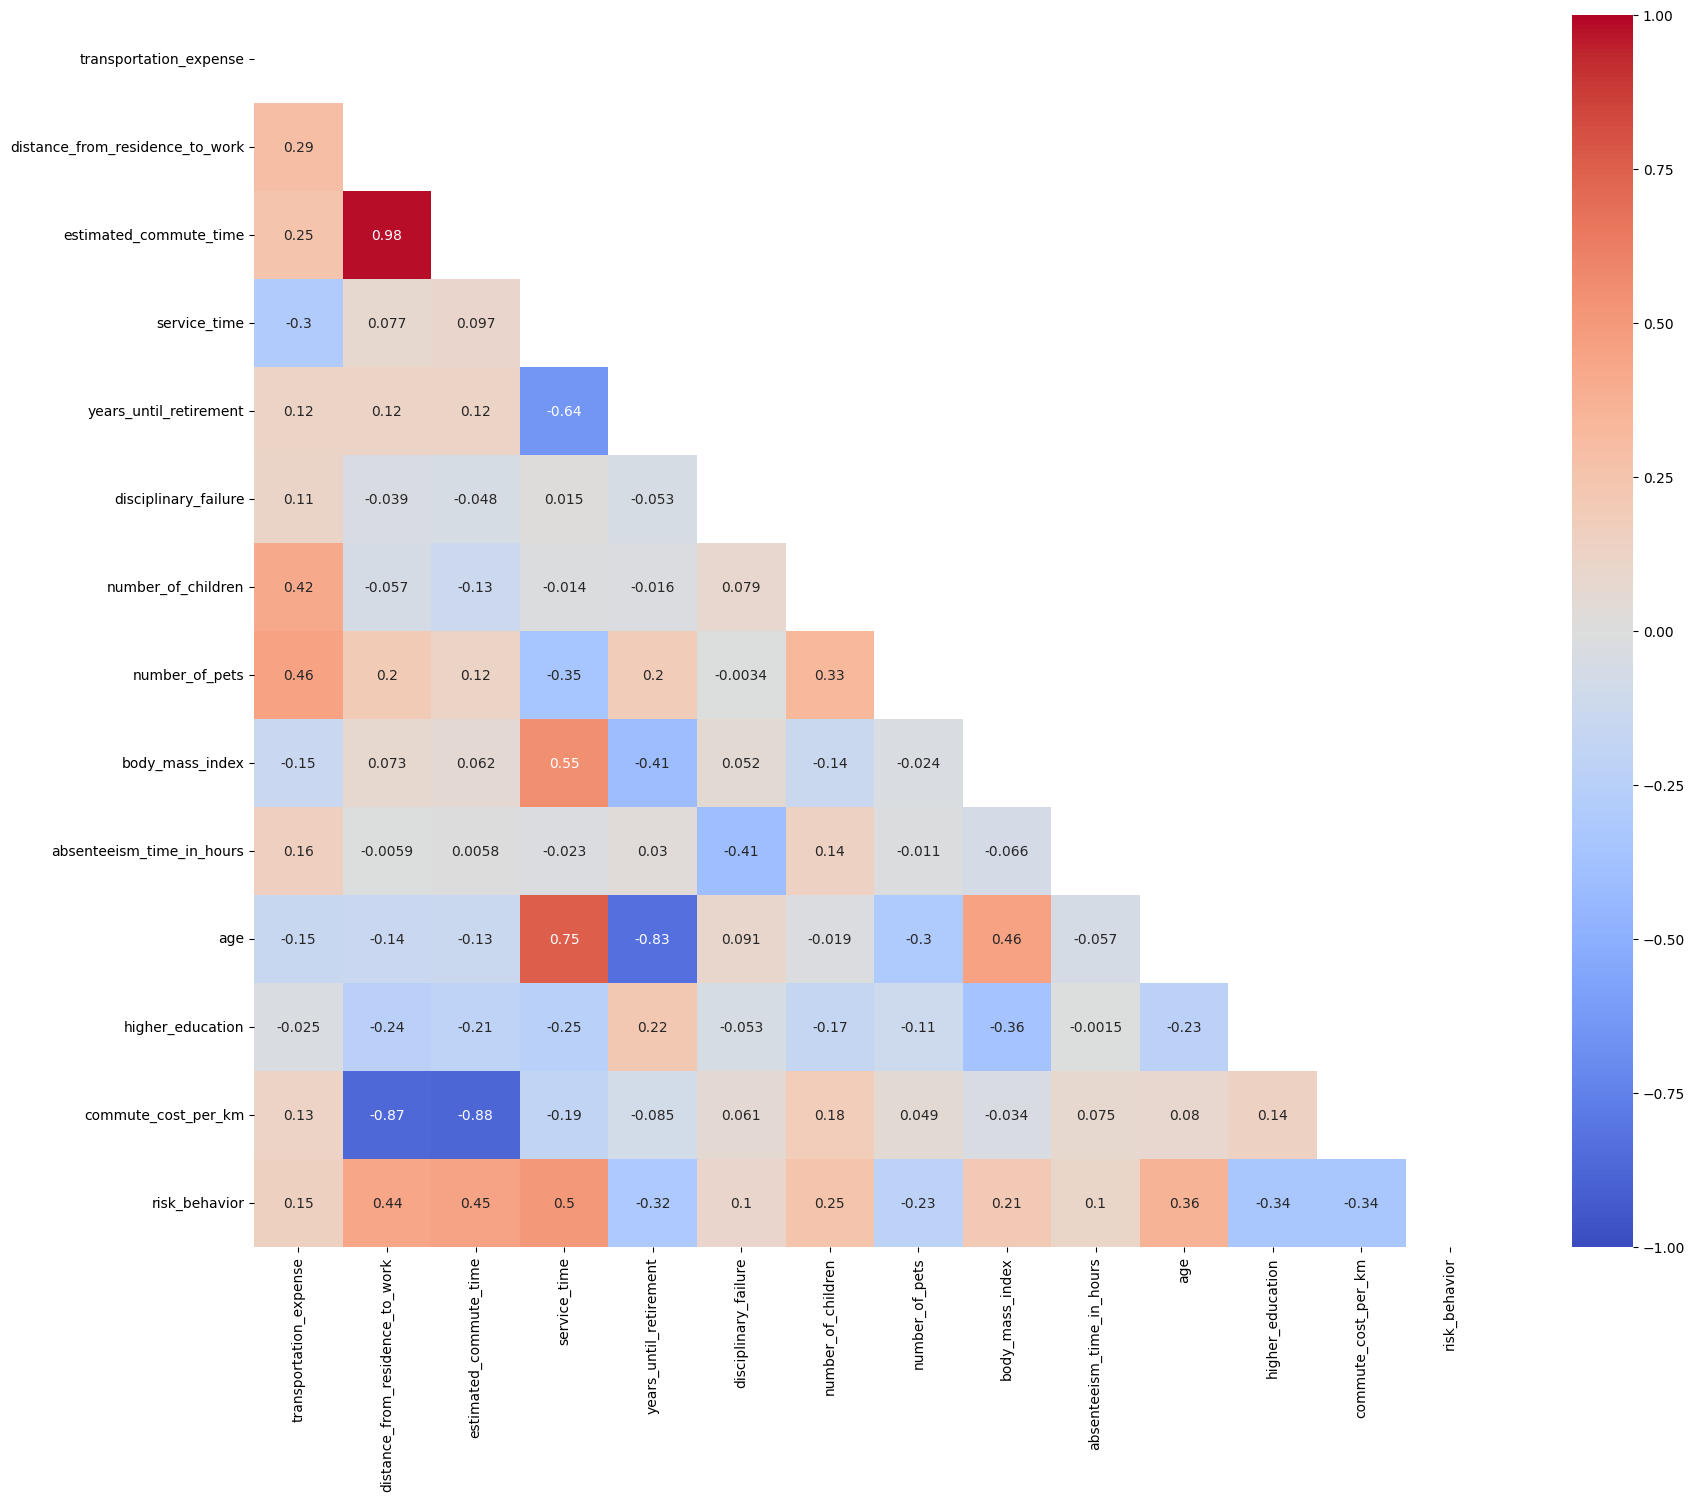

In [52]:
cor_heatmap(num_cols.corr(method='spearman'))

Looking at the correlation heatmap, there are a few issues that become clear right away:
+ We can only keep 1 of the following 3 variables: "commute_cost_per_km", "distance_from_residence_to_work" and "estimated_commute_time". We will choose to keep the variable we have created "commute_cost_per_km", thus we will drop "distance_from_residence_to_work" and "estimated_commute_time". We believe this variable contains more relevant information than the two we're dropping, this is supported by the relatively low correlation it has with "transportation_expense", one of the variables from which it is derived, meaning it has uncovered previously unseen information.
+ We can only keep "age" if we remove "service_time" and "years_until_retirement", removing "age" allows us to keep these 2 variables. 

Based on these conclusions, we will drop "age", "distance_from_residence_to_work" and "estimated_commute_time" from both of our imputed datasets.  

In [53]:
imputed_df.drop(["service_time", "years_until_retirement", "distance_from_residence_to_work", "estimated_commute_time"], axis=1, inplace=True)
imputed_df_scaled.drop(["service_time", "years_until_retirement", "distance_from_residence_to_work", "estimated_commute_time"], axis=1, inplace=True)

# 8. <a id='toc8_'></a>[Final Transformations and Dataset Export](#toc0_)


Going into the final section of our preprocessing notebook, it's crucial that we explain the distinction between the 2 datasets we will export from this notebook:
+ **data_for_modelling**: This is the dataset we will feed into clustering models during the modeling phase of the project, as such it will have choices made with the limitations of models, and the goal of optimizing data formats for models. This dataset will be developed based on the imputed_df_scaled dataset from above.
+ **data_for_analysis**: This dataset will be used to analyze and extract insights from the results of clustering solutions, as well comparing results of different clustering solutions. This dataset will be developed based on the imputed_df dataset from above.

**Note:** We are going to include some categorical variables within our data used for modeling, such as disciplinary_failure, higher_education, risk_behavior and reason_for_absence encoded as dummies. Traditionally, this can be complicated as defining how to measure categorical differences within a distance formula like the euclidean distance can be difficult. In our case due to the choice to use Robust Scaler, within the euclidean distance formula, these categorical differences will have the same impact as the difference between observations with Q1 and Q3 values for a numerical variable. In our opinion, this is a fair compromise and allows us to include information that we believe is relevant in our models, without generating inherent bias. This explanation will be repeated later on, when finalizing the data to be used for modelling clusters.

## 8.1. <a id='toc8_1_'></a>[Data For Modeling](#toc0_)

As mentioned above this dataset is based on the imputed_df_scaled so we'll start by copying it. <p>
As we mentioned during the imputation, for our modeling dataset we will encode the "month_of_absence" and "day_of_the_week" variables as cyclical to keep their cyclical nature, i.e. January being close to . For that we will use the CyclicalFeatures method from the feature_engine package, which transforms variables using sine and cosine to keep cyclical information. This method receives the variables encoded as ordinal. To do this we'll grab the variable we defined earlier, imputed_month_weekday_ordinal, which contains the rounded ordinal encondings for these variables.

In [54]:
data_for_modeling = imputed_df_scaled.copy()

In [55]:
imputed_month_weekday_ordinal

,month_of_absence,day_of_the_week
0,7.00,2.00
1,7.00,2.00
2,7.00,3.00
3,7.00,4.00
4,7.00,4.00
...,...,...
795,7.00,2.00
796,7.00,2.00
797,7.00,2.00
798,7.00,3.00


We'll now define the instance of the CyclicalFeatures method, setting drop_original to True to drop the original variables and keep only the sine and cosine columns. We'll join the result with the data_for_modeling dataset.

In [56]:
cyclical_encoder = CyclicalFeatures(drop_original=True)

In [57]:
data_for_modeling = data_for_modeling.join(cyclical_encoder.fit_transform(imputed_month_weekday_ordinal))
data_for_modeling.head()

,transportation_expense,disciplinary_failure,number_of_children,number_of_pets,body_mass_index,absenteeism_time_in_hours,age,higher_education,commute_cost_per_km,risk_behavior,month_of_absence_sin,month_of_absence_cos,day_of_the_week_sin,day_of_the_week_cos
0,0.79,0.00,0.50,1.00,0.71,0.17,-0.44,0.00,-0.11,0.00,-0.50,-0.87,0.87,-0.50
1,-1.32,1.00,0.00,0.00,0.86,-0.50,1.44,0.00,0.07,0.00,-0.50,-0.87,0.87,-0.50
2,-0.57,0.00,-0.50,0.00,0.86,-0.17,0.11,0.00,-0.90,0.00,-0.50,-0.87,0.00,-1.00
3,0.67,0.00,0.50,0.00,-0.14,0.17,0.22,0.00,3.73,0.00,-0.50,-0.87,-0.87,-0.50
4,0.79,0.00,0.50,1.00,0.71,-0.17,-0.44,0.00,-0.11,0.00,-0.50,-0.87,-0.87,-0.50


Now, the final transformation for our modelling data is to join back the reason_for_absence variable and obtaining the dummy variables that encode it, dropping one.

In [58]:
data_for_modeling = data_for_modeling.join(data['reason_for_absence'])
data_for_modeling.head()

,transportation_expense,disciplinary_failure,number_of_children,number_of_pets,body_mass_index,absenteeism_time_in_hours,age,higher_education,commute_cost_per_km,risk_behavior,month_of_absence_sin,month_of_absence_cos,day_of_the_week_sin,day_of_the_week_cos,reason_for_absence
0,0.79,0.00,0.50,1.00,0.71,0.17,-0.44,0.00,-0.11,0.00,-0.50,-0.87,0.87,-0.50,Unjustified absence
1,-1.32,1.00,0.00,0.00,0.86,-0.50,1.44,0.00,0.07,0.00,-0.50,-0.87,0.87,-0.50,Unspecified
2,-0.57,0.00,-0.50,0.00,0.86,-0.17,0.11,0.00,-0.90,0.00,-0.50,-0.87,0.00,-1.00,Medical Care
3,0.67,0.00,0.50,0.00,-0.14,0.17,0.22,0.00,3.73,0.00,-0.50,-0.87,-0.87,-0.50,Acute Disease
4,0.79,0.00,0.50,1.00,0.71,-0.17,-0.44,0.00,-0.11,0.00,-0.50,-0.87,-0.87,-0.50,Medical Care


In [59]:
data_for_modeling = pd.get_dummies(data_for_modeling, drop_first=True, dtype=int)
data_for_modeling

,transportation_expense,disciplinary_failure,number_of_children,number_of_pets,body_mass_index,absenteeism_time_in_hours,age,higher_education,commute_cost_per_km,risk_behavior,month_of_absence_sin,month_of_absence_cos,day_of_the_week_sin,day_of_the_week_cos,reason_for_absence_Chronic Disease,reason_for_absence_Maternity/Pregnancy-Related,reason_for_absence_Medical Care,reason_for_absence_Mental Disease,reason_for_absence_Unjustified absence,reason_for_absence_Unspecified
0,0.79,0.00,0.50,1.00,0.71,0.17,-0.44,0.00,-0.11,0.00,-0.50,-0.87,0.87,-0.50,0,0,0,0,1,0
1,-1.32,1.00,0.00,0.00,0.86,-0.50,1.44,0.00,0.07,0.00,-0.50,-0.87,0.87,-0.50,0,0,0,0,0,1
2,-0.57,0.00,-0.50,0.00,0.86,-0.17,0.11,0.00,-0.90,0.00,-0.50,-0.87,0.00,-1.00,0,0,1,0,0,0
3,0.67,0.00,0.50,0.00,-0.14,0.17,0.22,0.00,3.73,0.00,-0.50,-0.87,-0.87,-0.50,0,0,0,0,0,0
4,0.79,0.00,0.50,1.00,0.71,-0.17,-0.44,0.00,-0.11,0.00,-0.50,-0.87,-0.87,-0.50,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.79,0.00,0.50,1.00,0.71,0.83,-0.44,0.00,-0.11,0.00,-0.50,-0.87,0.87,-0.50,0,0,0,0,0,0
796,0.12,0.00,0.00,1.00,0.57,0.17,0.00,1.00,2.22,-1.00,-0.50,-0.87,0.87,-0.50,0,0,0,0,0,0
797,-1.32,0.00,0.00,4.00,1.29,-0.50,0.33,0.00,-0.04,0.00,-0.50,-0.87,0.87,-0.50,0,0,0,0,0,1
798,0.07,0.00,0.50,2.00,1.43,-0.50,0.22,0.00,-0.36,0.00,-0.50,-0.87,0.00,-1.00,0,0,0,0,0,1


Now that we have completed all of the transformations required to prepare our dataset for modeling, we are going to export it in csv format, so that it can be imported in the clustering notebook.

In [60]:
data_for_modeling.to_csv('data_for_modeling.csv')

## 8.2. <a id='toc8_2_'></a>[Data for Analysis](#toc0_)

As mentioned above this dataset is based on the imputed_df so we'll start by copying it. <p>
We'll start our transformations by performing a small transformation of the day_of_the_week variable. Categorizing the day of the week into 'near_weekend', 'mid_week', and 'weekend' can provide insights into absenteeism patterns related to the workweek structure. 
Employees may have different motivations for taking absences depending on the day of the week. For instance, absences on Fridays and Mondays might be more common due to extended weekends, 
while mid-week absences could be influenced by workload or personal commitments. Weekend absences might indicate different behavioral patterns altogether. We'll also rename the variable to "weekday_type".

In [61]:
data_for_analysis = imputed_df.copy()

In [62]:
# Creating the map of the weekday to the weekday type
weekday_category_map = {
    "Monday": "near_weekend",
    "Friday": "near_weekend",
    "Tuesday": "mid_week",
    "Wednesday": "mid_week",
    "Thursday": "mid_week",
    "Saturday": "weekend",
    "Sunday": "weekend"}

# Applying the map and renaming the column
data_for_analysis['day_of_the_week'] = data_for_analysis['day_of_the_week'].map(weekday_category_map)
data_for_analysis.rename({"day_of_the_week" : 'weekday_type'}, axis=1, inplace=True)
data_for_analysis.head()

,month_of_absence,weekday_type,transportation_expense,disciplinary_failure,number_of_children,number_of_pets,body_mass_index,absenteeism_time_in_hours,age,higher_education,commute_cost_per_km,risk_behavior
0,July,mid_week,289.00,0.00,2.00,1.00,30.00,4.00,33.00,0.00,8.03,1.00
1,July,mid_week,118.00,1.00,1.00,0.00,31.00,0.00,50.00,0.00,9.08,1.00
2,July,mid_week,179.00,0.00,0.00,0.00,31.00,2.00,38.00,0.00,3.51,1.00
3,July,mid_week,279.00,0.00,2.00,0.00,24.00,4.00,39.00,0.00,30.00,1.00
4,July,mid_week,289.00,0.00,2.00,1.00,30.00,2.00,33.00,0.00,8.03,1.00


Additionally we'll rejoin the reason_for_absence variable.

In [63]:
data_for_analysis = data_for_analysis.join(data['reason_for_absence'])
data_for_analysis.head()

,month_of_absence,weekday_type,transportation_expense,disciplinary_failure,number_of_children,number_of_pets,body_mass_index,absenteeism_time_in_hours,age,higher_education,commute_cost_per_km,risk_behavior,reason_for_absence
0,July,mid_week,289.00,0.00,2.00,1.00,30.00,4.00,33.00,0.00,8.03,1.00,Unjustified absence
1,July,mid_week,118.00,1.00,1.00,0.00,31.00,0.00,50.00,0.00,9.08,1.00,Unspecified
2,July,mid_week,179.00,0.00,0.00,0.00,31.00,2.00,38.00,0.00,3.51,1.00,Medical Care
3,July,mid_week,279.00,0.00,2.00,0.00,24.00,4.00,39.00,0.00,30.00,1.00,Acute Disease
4,July,mid_week,289.00,0.00,2.00,1.00,30.00,2.00,33.00,0.00,8.03,1.00,Medical Care


Finally, we'll create dummy variables for the "month_of_absence", "weekday_type" and "reason_for_absence" variables. Since this dataset is for analysis only, we'll keep all of the dummies and won't drop one of the columns, as there are no concerns with the curse of dimensionality since it won't be fed into any models.

In [64]:
# This cell transforms the "month_of_absence" into an ordered categorical
# column, this is done to ensure the dummies for each month appear in calendar
# and not in a random order, as this is easier to analyze.
month_order = ["January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"]

data_for_analysis["month_of_absence"] = pd.Categorical(
    data_for_analysis["month_of_absence"],
    categories=month_order,
    ordered=True)


In [65]:
data_for_analysis = pd.get_dummies(data_for_analysis, drop_first=False, prefix=['month', 'is', 'reason'], dtype=int)
data_for_analysis

,transportation_expense,disciplinary_failure,number_of_children,number_of_pets,body_mass_index,absenteeism_time_in_hours,age,higher_education,commute_cost_per_km,risk_behavior,month_January,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December,is_mid_week,is_near_weekend,is_weekend,reason_Acute Disease,reason_Chronic Disease,reason_Maternity/Pregnancy-Related,reason_Medical Care,reason_Mental Disease,reason_Unjustified absence,reason_Unspecified
0,289.00,0.00,2.00,1.00,30.00,4.00,33.00,0.00,8.03,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,118.00,1.00,1.00,0.00,31.00,0.00,50.00,0.00,9.08,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,179.00,0.00,0.00,0.00,31.00,2.00,38.00,0.00,3.51,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,279.00,0.00,2.00,0.00,24.00,4.00,39.00,0.00,30.00,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,289.00,0.00,2.00,1.00,30.00,2.00,33.00,0.00,8.03,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,289.00,0.00,2.00,1.00,30.00,8.00,33.00,0.00,8.03,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
796,235.00,0.00,1.00,1.00,29.00,4.00,37.00,1.00,21.36,0.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
797,118.00,0.00,1.00,4.00,34.00,0.00,40.00,0.00,8.43,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
798,231.00,0.00,2.00,2.00,35.00,0.00,39.00,0.00,6.60,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Now that we have completed all of the transformations required to prepare our dataset for analysis, we are going to export it in csv format, so that it can be imported in the clustering notebook.

In [66]:
data_for_analysis.to_csv('data_for_analysis.csv')